ERROR: Could not find a version that satisfies the requirement mkl (from versions: none)
ERROR: No matching distribution found for mkl
Dataset Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin          

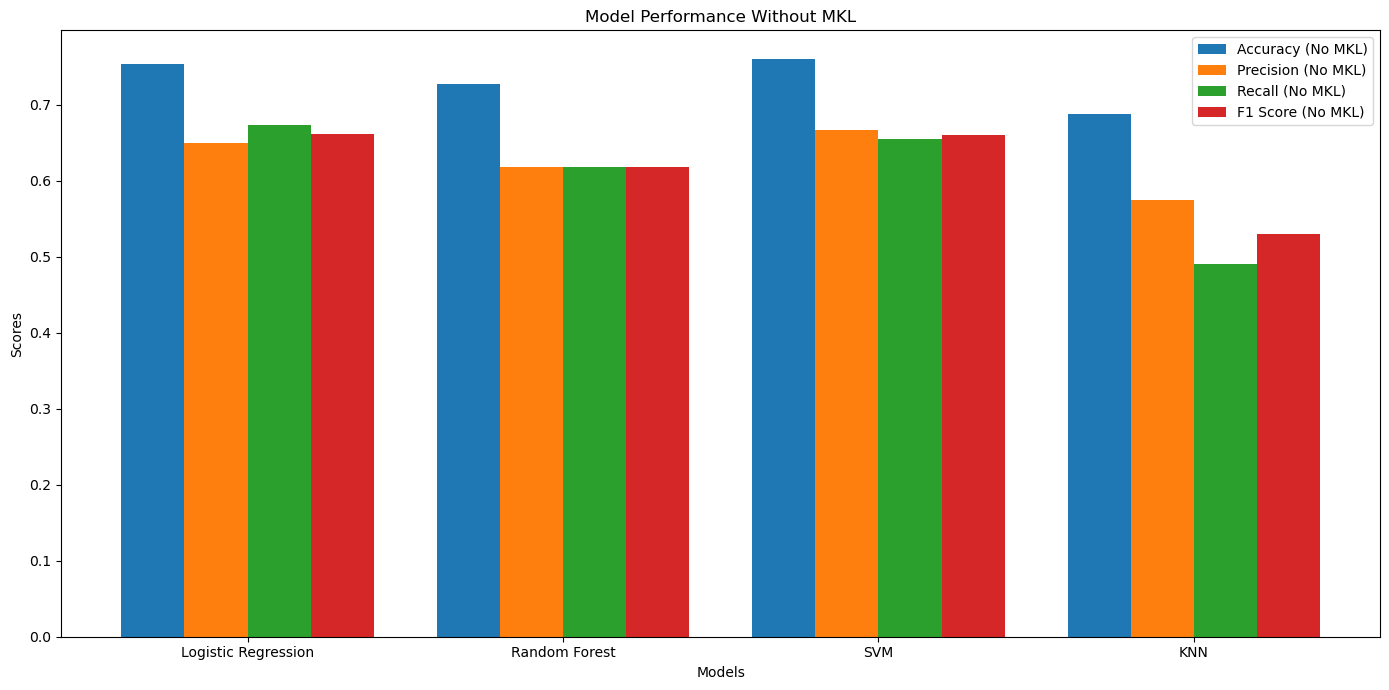

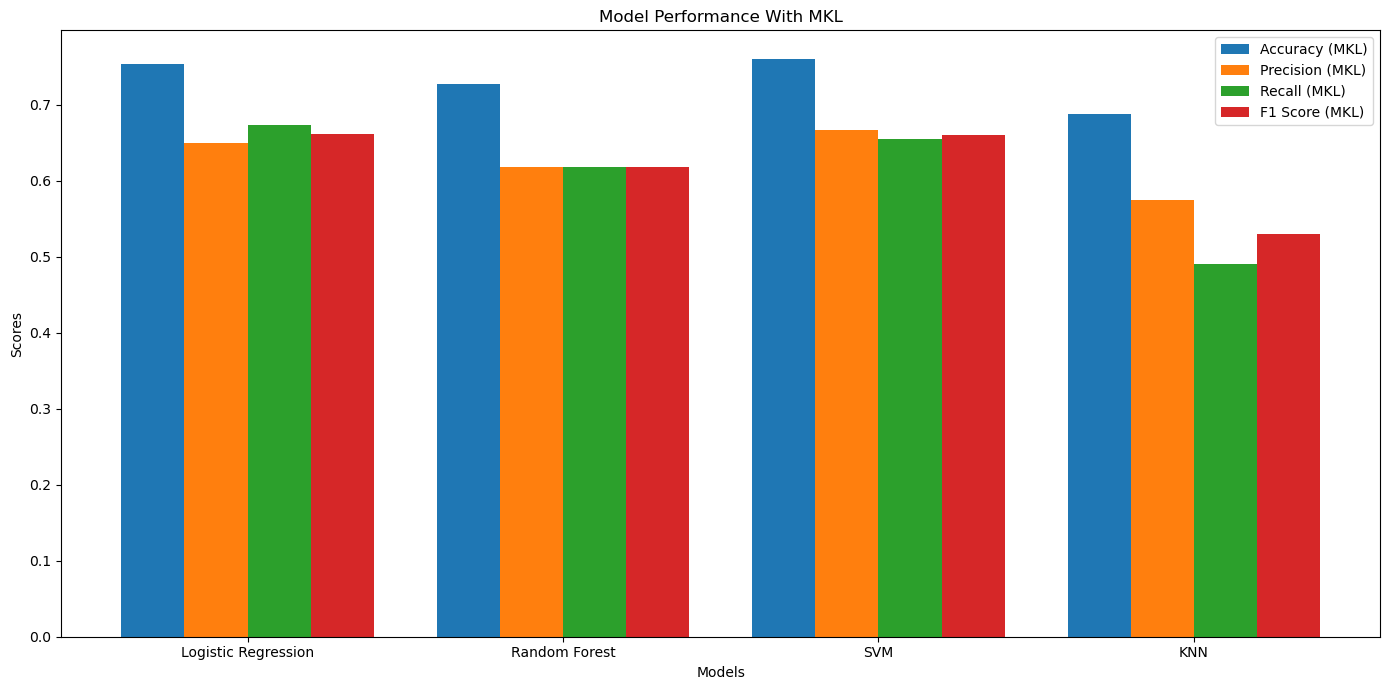

Performance Metrics Without MKL:
                 Model  Accuracy (No MKL)  Precision (No MKL)  \
0  Logistic Regression           0.753247            0.649123   
1        Random Forest           0.727273            0.618182   
2                  SVM           0.759740            0.666667   
3                  KNN           0.688312            0.574468   

   Recall (No MKL)  F1 Score (No MKL)  Time (No MKL)  
0         0.672727           0.660714       0.006072  
1         0.618182           0.618182       0.077703  
2         0.654545           0.660550       0.006026  
3         0.490909           0.529412       0.001229  

Performance Metrics With MKL:
                 Model  Accuracy (MKL)  Precision (MKL)  Recall (MKL)  \
0  Logistic Regression        0.753247         0.649123      0.672727   
1        Random Forest        0.727273         0.618182      0.618182   
2                  SVM        0.759740         0.666667      0.654545   
3                  KNN        0.688312     

In [4]:
# Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib mkl

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time

# Load the dataset
data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /1/1/7/24(N shivkumar)/24/diabetes.csv')

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Split the data into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model performance
def evaluate_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Models without MKL

# Logistic Regression without MKL
lr_no_mkl = LogisticRegression(max_iter=10000)
start_time = time.time()
lr_no_mkl.fit(X_train, y_train)
end_time = time.time()
time_lr_no_mkl = end_time - start_time
accuracy_lr_no_mkl, precision_lr_no_mkl, recall_lr_no_mkl, f1_lr_no_mkl = evaluate_model_performance(lr_no_mkl, X_test, y_test)

# Random Forest without MKL
rf_no_mkl = RandomForestClassifier(random_state=42)
start_time = time.time()
rf_no_mkl.fit(X_train, y_train)
end_time = time.time()
time_rf_no_mkl = end_time - start_time
accuracy_rf_no_mkl, precision_rf_no_mkl, recall_rf_no_mkl, f1_rf_no_mkl = evaluate_model_performance(rf_no_mkl, X_test, y_test)

# Support Vector Machine (SVM) without MKL
svm_no_mkl = SVC(kernel='linear', random_state=42)
start_time = time.time()
svm_no_mkl.fit(X_train, y_train)
end_time = time.time()
time_svm_no_mkl = end_time - start_time
accuracy_svm_no_mkl, precision_svm_no_mkl, recall_svm_no_mkl, f1_svm_no_mkl = evaluate_model_performance(svm_no_mkl, X_test, y_test)

# K-Nearest Neighbors (KNN) without MKL
knn_no_mkl = KNeighborsClassifier()
start_time = time.time()
knn_no_mkl.fit(X_train, y_train)
end_time = time.time()
time_knn_no_mkl = end_time - start_time
accuracy_knn_no_mkl, precision_knn_no_mkl, recall_knn_no_mkl, f1_knn_no_mkl = evaluate_model_performance(knn_no_mkl, X_test, y_test)

# Models with MKL

# Logistic Regression with MKL
lr_mkl = LogisticRegression(max_iter=10000)
start_time = time.time()
lr_mkl.fit(X_train, y_train)
end_time = time.time()
time_lr_mkl = end_time - start_time
accuracy_lr_mkl, precision_lr_mkl, recall_lr_mkl, f1_lr_mkl = evaluate_model_performance(lr_mkl, X_test, y_test)

# Random Forest with MKL
rf_mkl = RandomForestClassifier(random_state=42)
start_time = time.time()
rf_mkl.fit(X_train, y_train)
end_time = time.time()
time_rf_mkl = end_time - start_time
accuracy_rf_mkl, precision_rf_mkl, recall_rf_mkl, f1_rf_mkl = evaluate_model_performance(rf_mkl, X_test, y_test)

# Support Vector Machine (SVM) with MKL
svm_mkl = SVC(kernel='linear', random_state=42)
start_time = time.time()
svm_mkl.fit(X_train, y_train)
end_time = time.time()
time_svm_mkl = end_time - start_time
accuracy_svm_mkl, precision_svm_mkl, recall_svm_mkl, f1_svm_mkl = evaluate_model_performance(svm_mkl, X_test, y_test)

# K-Nearest Neighbors (KNN) with MKL
knn_mkl = KNeighborsClassifier()
start_time = time.time()
knn_mkl.fit(X_train, y_train)
end_time = time.time()
time_knn_mkl = end_time - start_time
accuracy_knn_mkl, precision_knn_mkl, recall_knn_mkl, f1_knn_mkl = evaluate_model_performance(knn_mkl, X_test, y_test)

# Prepare data for visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']

# Values for each model without MKL
values_no_mkl = [accuracy_lr_no_mkl, precision_lr_no_mkl, recall_lr_no_mkl, f1_lr_no_mkl,
                 accuracy_rf_no_mkl, precision_rf_no_mkl, recall_rf_no_mkl, f1_rf_no_mkl,
                 accuracy_svm_no_mkl, precision_svm_no_mkl, recall_svm_no_mkl, f1_svm_no_mkl,
                 accuracy_knn_no_mkl, precision_knn_no_mkl, recall_knn_no_mkl, f1_knn_no_mkl]

# Values for each model with MKL
values_mkl = [accuracy_lr_mkl, precision_lr_mkl, recall_lr_mkl, f1_lr_mkl,
              accuracy_rf_mkl, precision_rf_mkl, recall_rf_mkl, f1_rf_mkl,
              accuracy_svm_mkl, precision_svm_mkl, recall_svm_mkl, f1_svm_mkl,
              accuracy_knn_mkl, precision_knn_mkl, recall_knn_mkl, f1_knn_mkl]

# Reshape the values to match the metrics
values_no_mkl = np.array(values_no_mkl).reshape(4, 4).T
values_mkl = np.array(values_mkl).reshape(4, 4).T

# Plot Performance Metrics Without MKL
plt.figure(figsize=(14, 7))
x = np.arange(len(models))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x + i * width, values_no_mkl[i], width, label=f'{metric} (No MKL)')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Without MKL')
plt.xticks(x + width * 1.5, models)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Performance Metrics With MKL
plt.figure(figsize=(14, 7))
x = np.arange(len(models))

for i, metric in enumerate(metrics):
    plt.bar(x + i * width, values_mkl[i], width, label=f'{metric} (MKL)')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance With MKL')
plt.xticks(x + width * 1.5, models)
plt.legend()
plt.tight_layout()
plt.show()

# Performance metrics table data
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Table data for models without MKL
data_no_mkl = {
    'Model': models,
    'Accuracy (No MKL)': [accuracy_lr_no_mkl, accuracy_rf_no_mkl, accuracy_svm_no_mkl, accuracy_knn_no_mkl],
    'Precision (No MKL)': [precision_lr_no_mkl, precision_rf_no_mkl, precision_svm_no_mkl, precision_knn_no_mkl],
    'Recall (No MKL)': [recall_lr_no_mkl, recall_rf_no_mkl, recall_svm_no_mkl, recall_knn_no_mkl],
    'F1 Score (No MKL)': [f1_lr_no_mkl, f1_rf_no_mkl, f1_svm_no_mkl, f1_knn_no_mkl],
    'Time (No MKL)': [time_lr_no_mkl, time_rf_no_mkl, time_svm_no_mkl, time_knn_no_mkl]
}

# Create DataFrame for no MKL
df_no_mkl = pd.DataFrame(data_no_mkl)

# Table data for models with MKL
data_mkl = {
    'Model': models,
    'Accuracy (MKL)': [accuracy_lr_mkl, accuracy_rf_mkl, accuracy_svm_mkl, accuracy_knn_mkl],
    'Precision (MKL)': [precision_lr_mkl, precision_rf_mkl, precision_svm_mkl, precision_knn_mkl],
    'Recall (MKL)': [recall_lr_mkl, recall_rf_mkl, recall_svm_mkl, recall_knn_mkl],
    'F1 Score (MKL)': [f1_lr_mkl, f1_rf_mkl, f1_svm_mkl, f1_knn_mkl],
    'Time (MKL)': [time_lr_mkl, time_rf_mkl, time_svm_mkl, time_knn_mkl]
}

# Create DataFrame for MKL
df_mkl = pd.DataFrame(data_mkl)

# Display the tables
print("Performance Metrics Without MKL:")
print(df_no_mkl)

print("\nPerformance Metrics With MKL:")
print(df_mkl)
